[View in Colaboratory](https://colab.research.google.com/github/rein634/samplecode/blob/master/Athome_rentapartment_Tokyo_scatterplot.ipynb)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
cd /content/drive/My Drive/HousingSupply/data/src/athome/Tokyo

/content/drive/My Drive/HousingSupply/data/src/athome/Tokyo


In [11]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 10,10
plt.rcParams["font.size"] = 18

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#散布図の作成
*  [Athome_rentoffice_ols_only_Tokyo_2015.ipynb](https://gitlab.com/SengokuLAB/exHomeSalesEstimation/blob/develop/notebook/Athome_rentoffice_ols_only_Tokyo_2015.ipynb)の宮本さん作成のコードの通りに東京都の賃貸マンションについて散布図を作成

In [19]:
df = pd.read_csv("athome_renthome_TokyoBunkyo.csv",nrows = 5, dtype = "str") #encoding = "shift-jis"
df.columns

Index(['物件番号', '種目名称', '新築中古区分', '都道府県', '所在地名1', '所在地名2', '沿線名称', '駅名称',
       '徒歩(分)', 'バス(分)', '停歩(分)', 'バス停名称', '賃料・価格', '地上階層', '地下階層', '所在階',
       '建物構造', '専有・建物面積', 'バルコニー面積', '土地面積', '地目', '都市計画', '用途地域', '地勢',
       '土地権利名称', '建ぺい率', '容積率', '築年', '築月', '公開日付', '棟ID'],
      dtype='object')

In [30]:
df = pd.read_csv("athome_renthome_TokyoBunkyo.csv",dtype = "str",usecols = ["都道府県","所在地名1","種目名称","所在階","建物構造","賃料・価格","専有・建物面積","築年","徒歩(分)"]) #,encoding = "shift-jis"
df["所在階"] = df["所在階"].str.replace("B","-")
df[["徒歩(分)","賃料・価格","所在階","専有・建物面積","築年"]] = df[["徒歩(分)","賃料・価格","所在階","専有・建物面積","築年"]].astype(float)
df = df.query('種目名称 == [ "貸マンション"]')
Tokyo = df.query('都道府県 == ["東京都"]')


Tokyo["築年数"] = 2015 - np.array(Tokyo["築年"])
Tokyo["単位面積当たり賃料"] = np.array(Tokyo["賃料・価格"])/np.array(Tokyo["専有・建物面積"])

#Tokyo = Tokyo.dropna(subset = [["築年数","単位面積当たり賃料","徒歩(分)"]]1)
Tokyo.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


,種目名称,都道府県,所在地名1,徒歩(分),賃料・価格,所在階,建物構造,専有・建物面積,築年,築年数,単位面積当たり賃料
0,貸マンション,東京都,文京区,4.0,83000.0,5.0,ＳＲＣ,27.47,0.0,2015.0,3021.477976
1,貸マンション,東京都,文京区,3.0,185000.0,6.0,ＳＲＣ,68.08,1982.0,33.0,2717.391304
2,貸マンション,東京都,文京区,8.0,62000.0,5.0,ＲＣ,14.46,1984.0,31.0,4287.690180


In [0]:
price_per_area_t = np.array(Tokyo["単位面積当たり賃料"])
price_t = np.array(Tokyo["賃料・価格"])
tohohun_t = np.array(Tokyo["徒歩(分)"])
chikunen_t = np.array(Tokyo["築年数"])

No handles with labels found to put in legend.


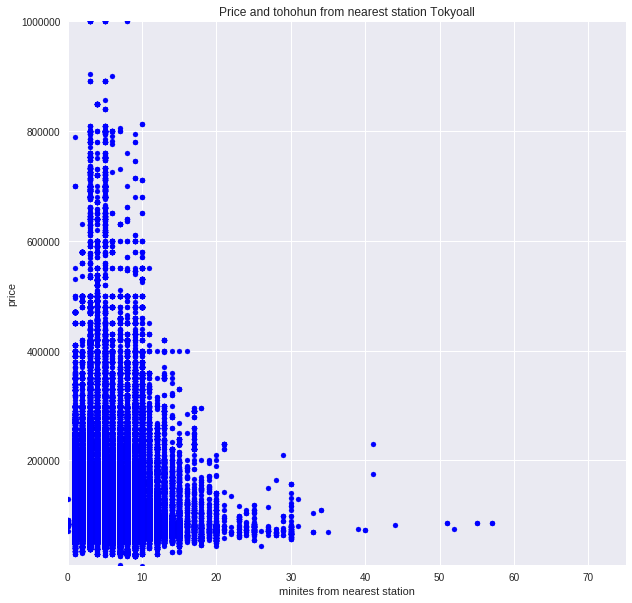

In [32]:
 fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(tohohun_t,price_t, s=100, marker='.',c='blue')

ax.set_ylim(10000,1000000)
ax.set_xlim(0,75)
ax.set_ylabel("price")
ax.set_xlabel("minites from nearest station")
ax.set_title("Price and tohohun from nearest station Tokyoall")
ax.legend(loc='upper right')

No handles with labels found to put in legend.


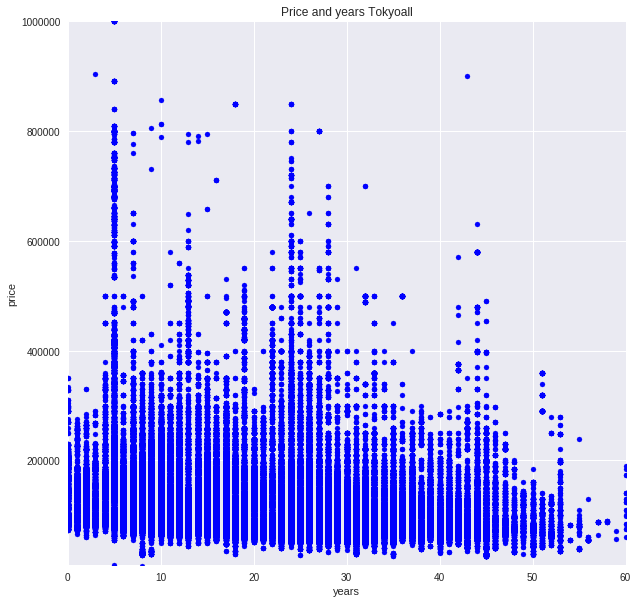

In [33]:
 fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(chikunen_t,price_t, s=100, marker='.',c='blue')

ax.set_ylim(10000,1000000)
ax.set_xlim(0,60)
ax.set_ylabel("price")
ax.set_xlabel("years")
ax.set_title("Price and years Tokyoall")
ax.legend(loc='upper right')

No handles with labels found to put in legend.


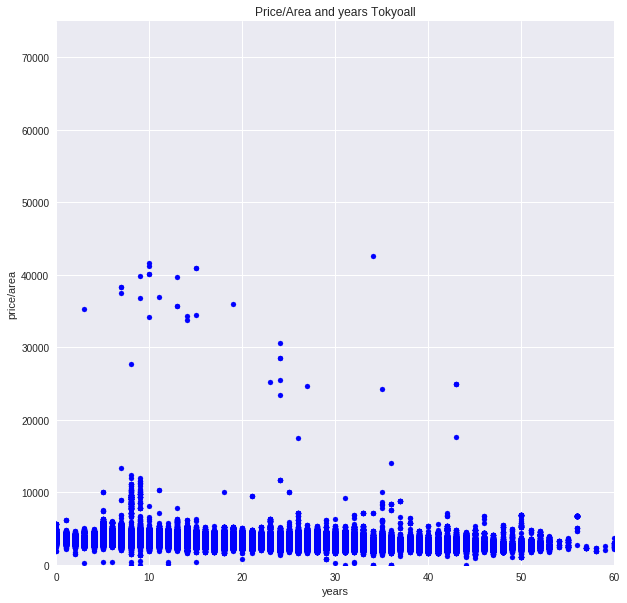

In [34]:
 fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(chikunen_t,price_per_area_t, s=100, marker='.',c='blue')

ax.set_ylim(0,75000)
ax.set_xlim(0,60)
ax.set_ylabel("price/area")
ax.set_xlabel("years")
ax.set_title("Price/Area and years Tokyoall")
ax.legend(loc='upper right')

No handles with labels found to put in legend.


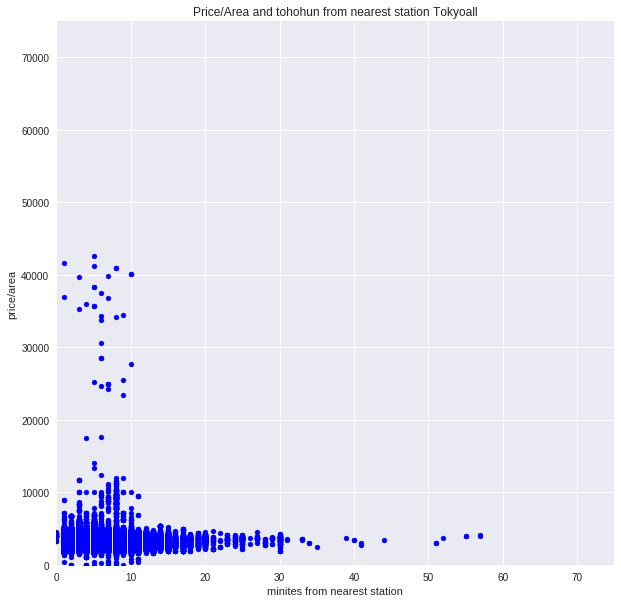

In [35]:
 fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(tohohun_t,price_per_area_t, s=100, marker='.',c='blue')

ax.set_ylim(0,75000)
ax.set_xlim(0,75)
ax.set_ylabel("price/area")
ax.set_xlabel("minites from nearest station")
ax.set_title("Price/Area and tohohun from nearest station Tokyoall")
ax.legend(loc='upper right')